# Unsupervised learning - K-means implementation
Goal of this excercise is to code the k-means algorithm for 2D data from scratch and vizualize results using provided toy datasets.

## K-means algorithm
1. Choose the number of clusters(K) and obtain the data points 
2. Place the centroids $c_1, c_2, ..... c_k$ randomly 
3. Repeat steps 4 and 5 until convergence or until the end of a fixed number of iterations
4. for each data point x_i:
   - find the nearest centroid($c_1, c_2, ..... c_k$)
   - **We will use euclidean distance** as a distance metric
   - assign the point to that cluster 
5. for each cluster j = 1..k
   - new centroid = mean of all points assigned to that cluster
6. End 
7. Return both the **Cluster ID** for each of the points and **centroids position**

#### You can watch [this](https://www.youtube.com/watch?v=5I3Ei69I40s) or [this](https://www.youtube.com/watch?v=OrvltpuxVQQ) video for better understanding of the principle.
#### Take a look at [this tool](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/) as well!

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('clusters3.csv', header=None, sep=';').rename({0: 'X', 1: 'Y'}, axis=1)
data = df.values

## First 10 points

In [6]:
df.head(10)

,X,Y
0,-8.904622,9.340533
1,-8.854129,10.615803
2,-8.750245,10.174964
3,-7.242460,9.180114
4,-7.314041,7.264030
5,-8.816045,9.638542
6,-7.677424,8.176395
7,-6.577886,8.622991
8,-4.825901,9.327486
9,-6.116779,8.168260


In [7]:
data[:10, :]

array([[-8.90462175,  9.34053331],
       [-8.85412893, 10.61580326],
       [-8.7502449 , 10.17496414],
       [-7.24246043,  9.18011444],
       [-7.31404141,  7.26402986],
       [-8.81604539,  9.63854214],
       [-7.6774239 ,  8.17639512],
       [-6.57788609,  8.6229914 ],
       [-4.82590133,  9.3274865 ],
       [-6.1167786 ,  8.1682598 ]])

In [8]:
data.shape

(300, 2)

## Plot the raw data

<AxesSubplot:xlabel='X', ylabel='Y'>

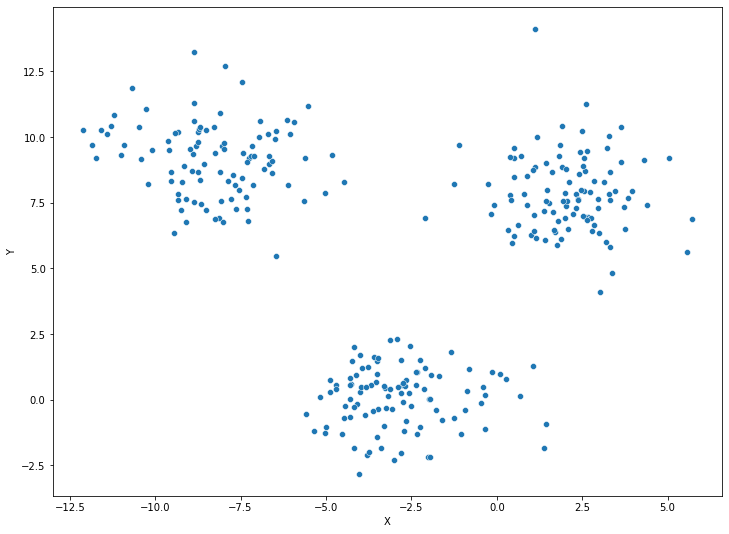

In [9]:
fig = plt.figure(figsize=(12,9))
sns.scatterplot(data = df, x='X', y='Y')

In [10]:
"""
dataframe: Pandas dataframe with input data
cluster_ids: array of cluster ids, e.g. [0,0,1,1,2,1,0,....] with the same length as the dataframe
centroids: array of 2D points (arrays with only two elements) with centroid position for each cluster, e.g. [[5,5], [-4,6], [4, 5]] for k = 3
"""
def vizualize_clusters(dataframe, cluster_ids, centroids):
    df_viz = dataframe.copy()
    df_viz['ClusterID'] = cluster_ids
    fig = plt.figure(figsize=(12,9))
    sns.scatterplot(data = df_viz, x='X', y='Y', hue='ClusterID', palette="deep")
    
    for centroid in centroids:
        plt.scatter(x=centroid[0], y=centroid[1], color='red')
    fig.show()

## Example of vizualize_clusters usage using random inputs

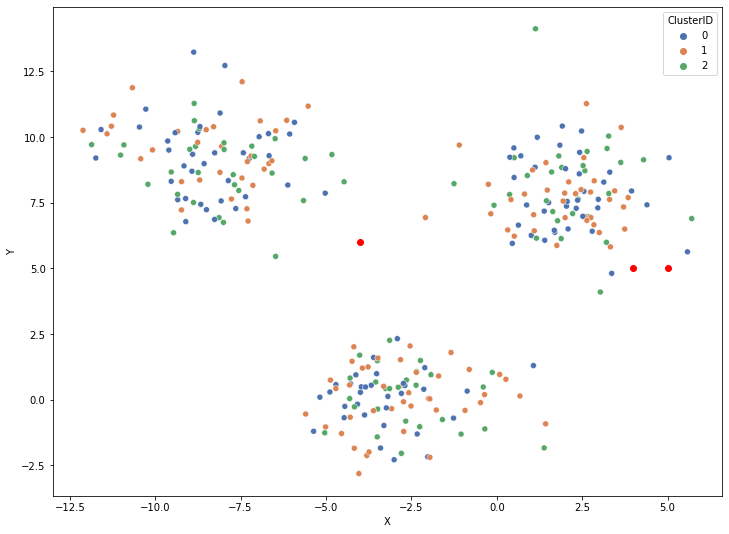

In [11]:
vizualize_clusters(df, np.random.choice([0,1,2], len(df)), [[5,5], [-4,6], [4, 5]])

## Finish the k-means implementation
Note: We will choose initial centroids as a random datapoints from the input matrix.

Sometimes the clusters may end up empty. There are some possible approaches to solve the issue:

- Remove the cluster - we usually don't want this because we want to obtain exactly *k* clusters
- Leave the centroid value unchanged and some datapoints may end up in the cluster in the next iteration
- Assign a random data point to the cluster or set random datapoint as centroid
- Restart the algorithm and hope it doesn’t happen again

In [12]:
def euclid_distance(x, y):
    assert x.size == y.size
    res = 0
    for i in range(len(x)):
        res += pow(x[i] - y[i], 2)
    return np.sqrt(res)
    pass

In [13]:
"""
data: Numpy array with the input data
k: number of clusters
iterations: number of iterations
Return: (cluster_ids, centroids)
"""
def k_means(data, k, iterations=1000):
    sample_idx = np.random.choice(data.shape[0], size=k, replace=False)
    centroids = data[sample_idx]
    cluster_ids = np.zeros(data.shape[0], dtype=np.int32)
    
    ## Your code
    for i in range(iterations):
        for idx, point in enumerate(data):
            nearest_centroid_id = None
            min_d = 9999
            for idx_c, c in enumerate(centroids):
                d = euclid_distance(point, c)
                if(d < min_d):
                    nearest_centroid_id = idx_c
                    min_d = d
            cluster_ids[idx] = nearest_centroid_id
        for idx_k in range(k):
            arr = np.where(cluster_ids == idx_k )
            mean = np.mean(data[arr],axis=0)
            # print(data[arr].shape, mean)
            centroids[idx_k] = mean
    
    return cluster_ids, centroids

k_means(data, 3, 100)

(array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
        1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0,
        1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

## Run the experiment
### Beware that you may need to tune the *iterations* parameter because otherwise the process may fail to converge
- The initial centroids are chosen at random so the results may vary across different algorithm runs

In [14]:
cluster_ids, centroids = k_means(data, 3, 500)

In [15]:
cluster_ids, centroids

(array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

# Results

### Clusters3

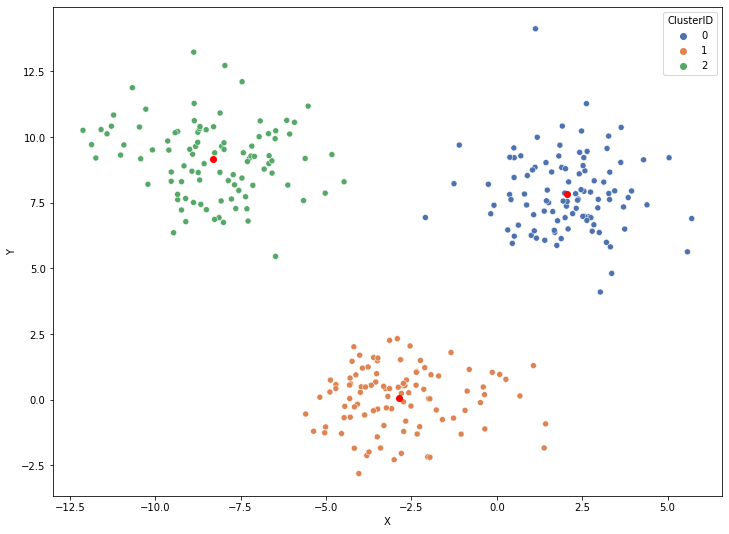

In [16]:
vizualize_clusters(df, cluster_ids, centroids)

### Clusters5

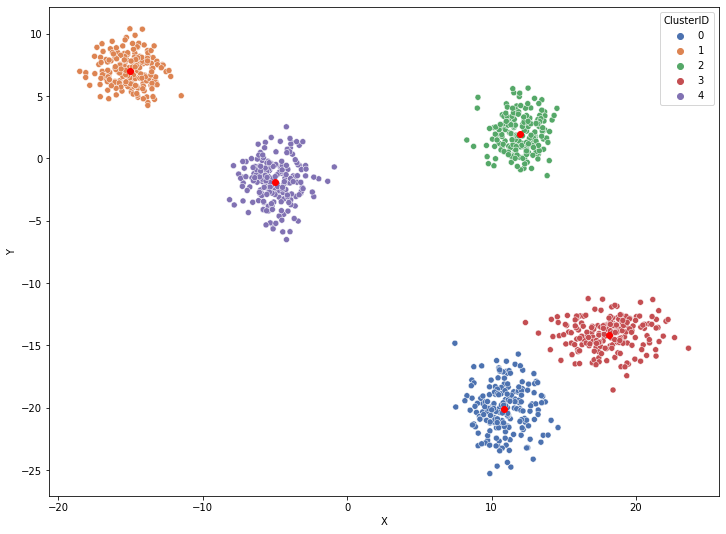

In [24]:
df = pd.read_csv('clusters5.csv', header=None, sep=';').rename({0: 'X', 1: 'Y'}, axis=1)
data = df.values
cluster_ids, centroids = k_means(data, 5, 500)
vizualize_clusters(df, cluster_ids, centroids)

### Clusters5n

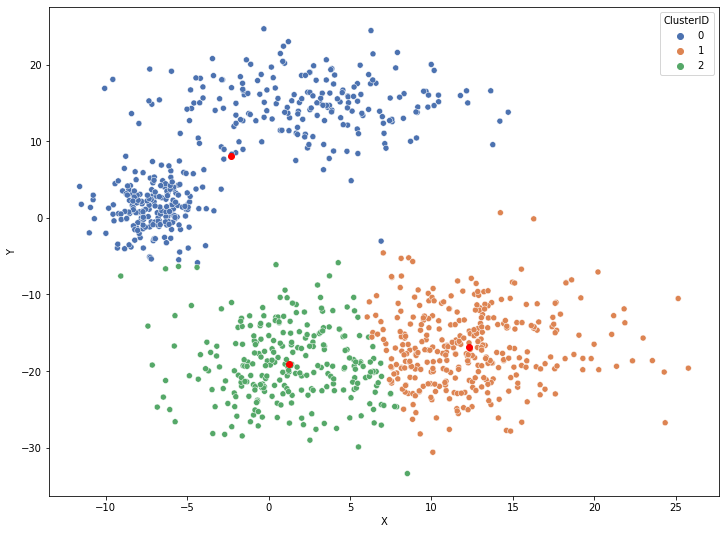

In [18]:
df = pd.read_csv('clusters5n.csv', header=None, sep=';').rename({0: 'X', 1: 'Y'}, axis=1)
data = df.values
cluster_ids, centroids = k_means(data, 3, 500)
vizualize_clusters(df, cluster_ids, centroids)

### Boxes

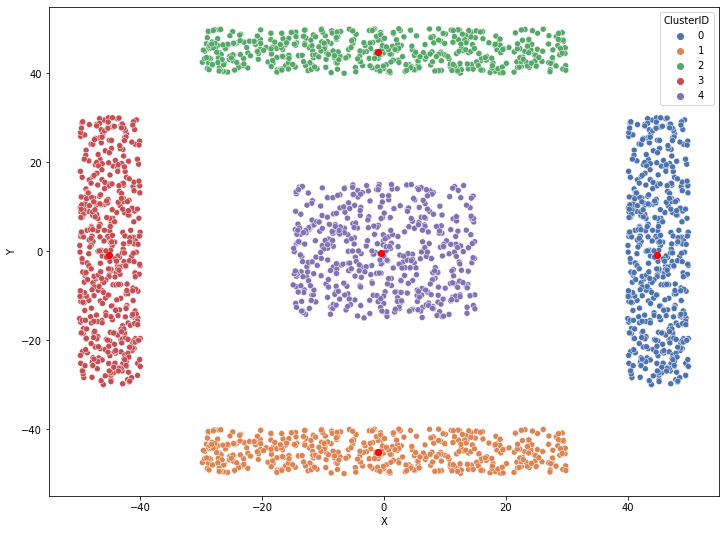

In [19]:
df = pd.read_csv('boxes.csv', header=None, sep=';').rename({0: 'X', 1: 'Y'}, axis=1)
data = df.values
cluster_ids, centroids = k_means(data, 5, 500)
vizualize_clusters(df, cluster_ids, centroids)

# Task (2p)
- Finish the k-means implementation and create plots for datasets:
    - clusters3
    - clusters5
    - clusters5n
    - boxes
